In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller as ADF
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Import Data
data = pd.read_excel("Data_1.xlsx") 
date = data.Period.apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
data = data.set_index(date[:]) 
df = data.iloc[:-2,:]
df.tail()

,Period,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries *,Services Producing Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,Business Services,Other Services Industries,Ownership Of Dwellings,Add: Taxes On Products,Gross Value Added At Basic Prices
Period,,,,,,,,,,,,,,,,,,
2018-10-01,20181001,131359.4,34480.1,28628.8,4390.0,1423.4,37.9,86369.6,22622.0,8141.5,2516.2,5166.3,15988.1,17930.1,14005.4,4510.9,5998.8,125360.6
2019-01-01,20190101,125745.4,31413.5,25482.6,4461.1,1434.8,35.0,83690.9,19861.6,7570.2,2491.7,5000.1,16395.2,17609.6,14762.5,4461.2,6179.8,119565.6
2019-04-01,20190401,125250.6,30958.9,25134.5,4269.5,1520.0,34.9,83036.4,20624.8,7958.1,2446.2,5248.9,16595.1,17689.3,12474.0,4562.3,6693.0,118557.6
2019-07-01,20190701,127910.5,32894.3,26921.0,4399.2,1532.2,41.9,83959.8,20833.8,7993.8,2654.3,5085.2,16478.3,17727.0,13187.4,4644.0,6412.4,121498.1
2019-10-01,20191001,128661.2,29195.4,22973.1,4659.5,1524.0,38.8,88154.1,21858.3,8619.8,2644.9,5428.8,17252.1,18450.2,13900.0,4694.9,6616.8,122044.4


In [3]:
# Drop subtotals columns
df = df.drop(columns = ["Period",
                        "Goods Producing Industries",
                        "Services Producing Industries",
                        "Gross Value Added At Basic Prices"], axis = 1) 

# Rank Top Industrial Sectors
df.iloc[:,1:].sum().sort_values(ascending = False) 

Manufacturing                    1693475.8
Wholesale & Retail Trade         1259614.8
Business Services                 995202.6
Finance & Insurance               884565.4
Other Services Industries         802664.0
Transportation & Storage          632465.1
Add: Taxes On Products            432069.2
Construction                      366040.1
Ownership Of Dwellings            293883.9
Information & Communications      286231.5
Accommodation & Food Services     175834.9
Utilities                         120437.0
Other Goods Industries *            9506.2
dtype: float64

In [4]:
# Extract the top 4 industry
df = df[["GDP At Current Market Prices","Manufacturing","Wholesale & Retail Trade","Business Services","Finance & Insurance"] ]
df.tail()

,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,
2018-10-01,131359.4,28628.8,22622.0,17930.1,15988.1
2019-01-01,125745.4,25482.6,19861.6,17609.6,16395.2
2019-04-01,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,128661.2,22973.1,21858.3,18450.2,17252.1


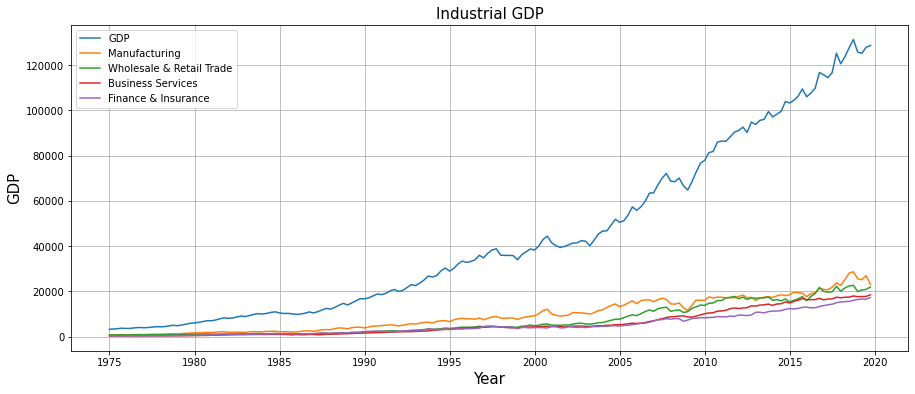

In [5]:
# Visualize the Data
plt.figure(figsize = (15,6))
plt.plot(df.index, df.iloc[:,0], label = "GDP")
plt.plot(df.index, df.iloc[:,1], label = "Manufacturing")
plt.plot(df.index, df.iloc[:,2], label = "Wholesale & Retail Trade")
plt.plot(df.index, df.iloc[:,3], label = "Business Services")
plt.plot(df.index, df.iloc[:,4], label = "Finance & Insurance")
plt.title("Industrial GDP", fontsize = 15)
plt.legend()
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.grid()

In [6]:
#Log all the data and create new columns
df.insert(0, 'Log_GDP', df['GDP At Current Market Prices'].apply(np.log))
df.insert(0, 'Log_F', df['Finance & Insurance'].apply(np.log))
df.insert(0, 'Log_B', df['Business Services'].apply(np.log))
df.insert(0, 'Log_W', df['Wholesale & Retail Trade'].apply(np.log))
df.insert(0, 'Log_M', df['Manufacturing'].apply(np.log))
df.tail()

,Log_M,Log_W,Log_B,Log_F,Log_GDP,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,,,,,,
2018-10-01,10.262168,10.026678,9.794236,9.679600,11.785692,131359.4,28628.8,22622.0,17930.1,15988.1
2019-01-01,10.145751,9.896543,9.776199,9.704744,11.742015,125745.4,25482.6,19861.6,17609.6,16395.2
2019-04-01,10.131997,9.934250,9.780715,9.716863,11.738072,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,10.200662,9.944332,9.782844,9.709800,11.759086,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,10.042079,9.992336,9.822830,9.755689,11.764938,128661.2,22973.1,21858.3,18450.2,17252.1


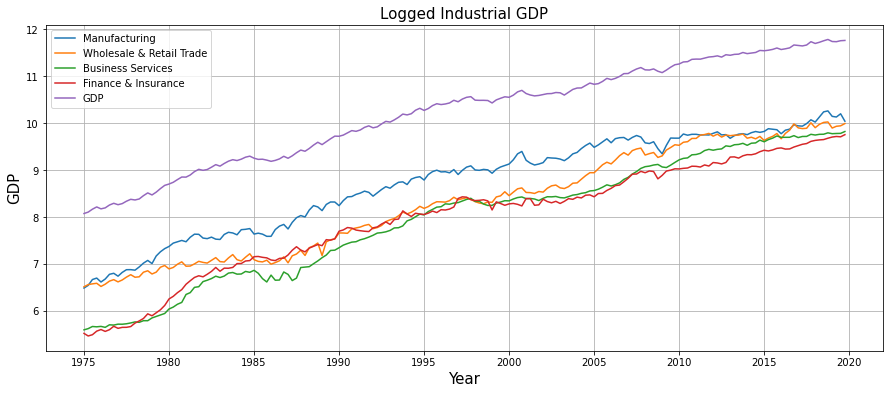

In [7]:
# Visualize the Logged Data
plt.figure(figsize = (15,6))
plt.plot(df.iloc[:,0], label = "Manufacturing")
plt.plot(df.iloc[:,1], label = "Wholesale & Retail Trade")
plt.plot(df.iloc[:,2], label = "Business Services")
plt.plot(df.iloc[:,3], label = "Finance & Insurance")
plt.plot(df.iloc[:,4], label = "GDP")
plt.title("Logged Industrial GDP", fontsize = 15)
plt.legend()
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.grid()

## Season-decompose

In [8]:
# Decompose Manufacturing Sector and extract the trend
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result_M = seasonal_decompose(df['Log_M'], freq = 4)
decompose_result_W = seasonal_decompose(df['Log_W'], freq = 4)
decompose_result_B = seasonal_decompose(df['Log_B'], freq = 4)
decompose_result_F = seasonal_decompose(df['Log_F'], freq = 4)
#decompose_result_GDP = seasonal_decompose(df['Log_GDP'], freq = 4)

df_trend_M = decompose_result_M.trend.dropna()
df_trend_W = decompose_result_W.trend.dropna()
df_trend_B = decompose_result_B.trend.dropna()
df_trend_F = decompose_result_F.trend.dropna()
#df_trend_GDP = decompose_result_GDP.trend.dropna()

In [9]:
df_trend = pd.concat([df_trend_M, df_trend_W, df_trend_B, df_trend_F], axis =1) # , df_trend_GDP
df_trend.columns = ["Log_M", "Log_W", "Log_B", "Log_F"] #"Log_GDP"]
df_trend

,Log_M,Log_W,Log_B,Log_F
Period,,,,
1975-07-01,6.613163,6.558140,5.642582,5.518663
1975-10-01,6.646204,6.560087,5.655179,5.541147
1976-01-01,6.677117,6.568504,5.663050,5.566728
1976-04-01,6.703791,6.585530,5.672189,5.593124
1976-07-01,6.732085,6.607390,5.682812,5.609308
...,...,...,...,...
2018-04-01,10.141644,9.978430,9.763365,9.643313
2018-07-01,10.180559,9.979737,9.770860,9.660670
2018-10-01,10.195575,9.973626,9.776683,9.678780


## Check for Stationarity and Make the Time Series Stationary

In [10]:
# Since the VAR model requires the time series to be stationary, 
#it is customary to check all the time series in the system for stationarity.
# ADF test is the most popular test for stationarity.

In [11]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = ADF(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [12]:
# If a series is found to be non-stationary, we can make it stationary by differencing 
# The series once and repeat the test again until it becomes stationary.

In [13]:
# 1st difference
data_differenced = df_trend.diff().dropna()
data_differenced

,Log_M,Log_W,Log_B,Log_F
Period,,,,
1975-10-01,0.033041,0.001947,0.012597,0.022484
1976-01-01,0.030913,0.008417,0.007870,0.025581
1976-04-01,0.026674,0.017026,0.009139,0.026396
1976-07-01,0.028294,0.021860,0.010624,0.016184
1976-10-01,0.033213,0.023366,0.014278,0.013980
...,...,...,...,...
2018-04-01,0.054988,0.017844,0.009747,0.018974
2018-07-01,0.038914,0.001307,0.007495,0.017357
2018-10-01,0.015016,-0.006111,0.005822,0.018111


In [14]:
#Because of Granger Causality Tests: W & B cause B
data_differenced_b = data_differenced.iloc[:,1:3]
data_differenced_b

,Log_W,Log_B
Period,,
1975-10-01,0.001947,0.012597
1976-01-01,0.008417,0.007870
1976-04-01,0.017026,0.009139
1976-07-01,0.021860,0.010624
1976-10-01,0.023366,0.014278
...,...,...
2018-04-01,0.017844,0.009747
2018-07-01,0.001307,0.007495
2018-10-01,-0.006111,0.005822


In [15]:
# ADF Test on each column TO ensure all data are stationary.
for name, column in data_differenced_b.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Log_W" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5776
 No. Lags Chosen       = 9
 Critical value 1%     = -3.471
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0062. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Log_B" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0165
 No. Lags Chosen       = 13
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0013. Rejecting Null Hypothesis.
 => Series is Stationary.




In [16]:
#Split dataset
nobs = 18
data_train, data_test = data_differenced_b[0:-nobs], data_differenced_b[-nobs:]

# Check size
print(data_train.shape)  # (157, 2)
print(data_test.shape)  # (18, 2)

(157, 2)
(18, 2)


## Select the Order (P) of VAR model

In [17]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR
# model and pick the order that gives a model with least AIC
from statsmodels.tsa.api import VAR
model = VAR(data_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic) 

Lag Order = 1
AIC :  -18.536721728862098
Lag Order = 2
AIC :  -19.014296537572143
Lag Order = 3
AIC :  -19.049677855440148
Lag Order = 4
AIC :  -19.05226690610118
Lag Order = 5
AIC :  -19.32993455956502
Lag Order = 6
AIC :  -19.57697842757066
Lag Order = 7
AIC :  -19.56427028082494
Lag Order = 8
AIC :  -19.504193722538208
Lag Order = 9
AIC :  -19.616318462773048
Lag Order = 10
AIC :  -19.64528546237216
Lag Order = 11
AIC :  -19.76748514054996
Lag Order = 12
AIC :  -19.777894886571392


## Train the VAR Model of Selected Order(p)


In [18]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Dec, 2020
Time:                     14:31:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.0574
Nobs:                     151.000    HQIC:                  -19.3659
Log likelihood:           1075.54    FPE:                3.14918e-09
AIC:                     -19.5770    Det(Omega_mle):     2.66971e-09
--------------------------------------------------------------------
Results for equation Log_W
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.003180         0.001218            2.611           0.009
L1.Log_W         1.569137         0.081165           19.333           0.000
L1.Log_B         0.112855         0.096891            1.165           0.244
L2.L

### From the regression results, our predictive model for the Business Service sector are as follows:


$$
\hat{LogB}_t = 1.726 LogB_{t-1} - 1.547 LogB_{t-2} + 1.346 LogB_{t-3} - 1.250 LogB_{t-4} + 0.976 LogB_{t-5} - 0.363 LogB_{t-6}  + 0.229 LogW_{t-1} - 0.268 LogW_{t-2} + 0.239 LogW_{t-3} - 0.258 LogW_{t-4}+ 0.243 LogW_{t-5}
$$


In [19]:
resid = pd.DataFrame(model_fitted.resid)
resid

,Log_W,Log_B
Period,,
1977-04-01,0.005502,0.002339
1977-07-01,-0.001201,-0.002085
1977-10-01,-0.004726,-0.003722
1978-01-01,0.002612,0.002021
1978-04-01,0.000231,-0.005869
...,...,...
2013-10-01,-0.005294,0.000262
2014-01-01,-0.006762,0.000089
2014-04-01,-0.000160,0.004961


In [20]:
resid.iloc[:,1:].sort_values(by=['Log_B'])

,Log_B
Period,
1985-01-01,-0.024083
1988-04-01,-0.017817
1986-07-01,-0.016613
1982-07-01,-0.015361
1994-07-01,-0.012136
...,...
1981-01-01,0.010861
1980-07-01,0.013759
1988-01-01,0.013896


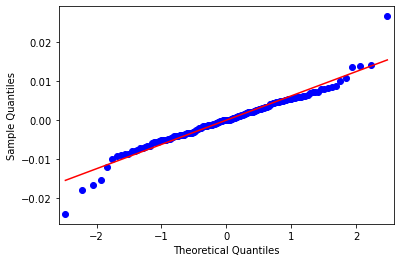

In [21]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
   
sm.qqplot(resid.iloc[:,1:].sort_values(by=['Log_B']), line ='s') 
py.show() 

In [22]:
from scipy import stats
stats.shapiro(resid)

ShapiroResult(statistic=0.9524582028388977, pvalue=2.5108342072144296e-08)

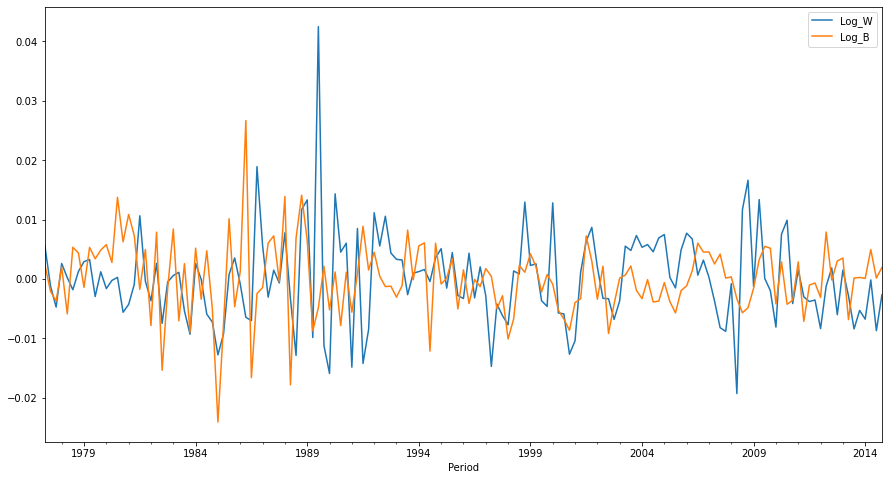

In [23]:
model_fitted.resid.plot(figsize =(15,8))

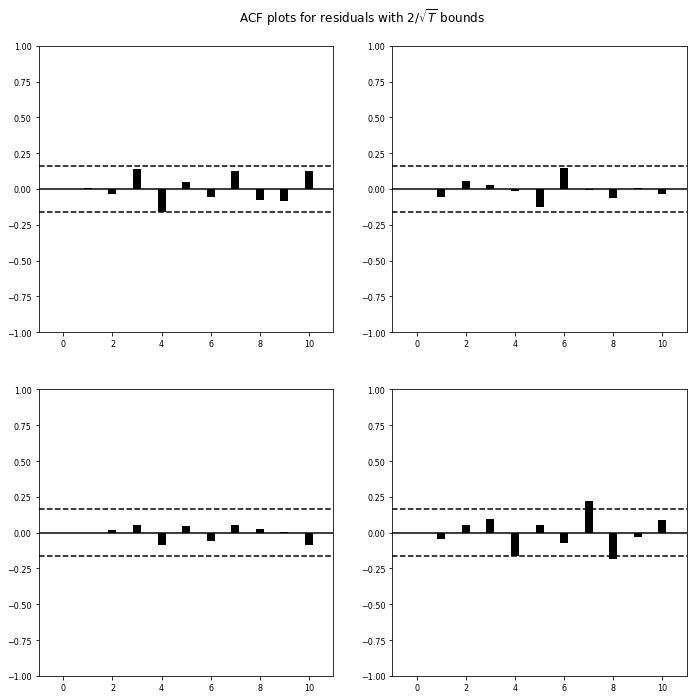

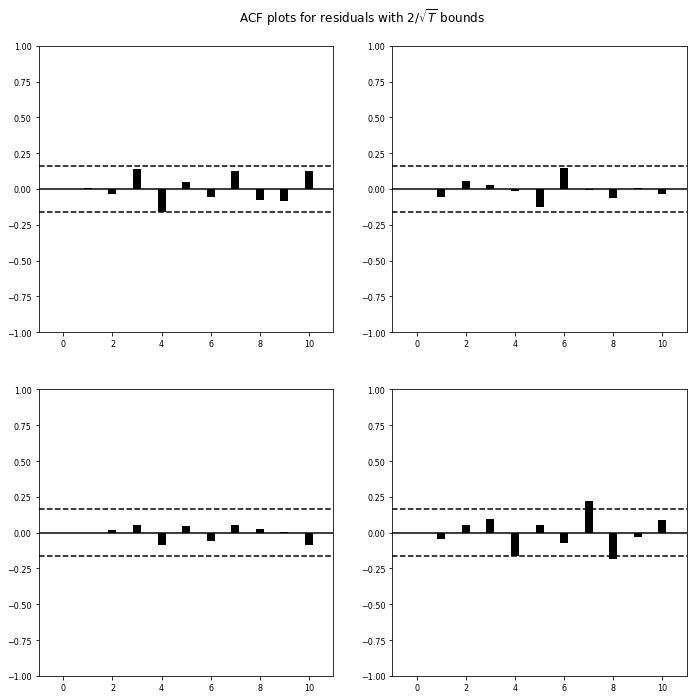

In [24]:
model_fitted.plot_acorr()

## Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [25]:
# The value of this statistic can vary between 0 and 4. The closer it is to the value 2,
# Then there is no significant serial correlation. The closer to 0, there is a positive 
# Serial correlation, and the closer it is to 4 implies negative serial correlation.

In [26]:
def adjust(val, length= 6): 
    return str(val).ljust(length)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data_differenced_b.columns, out):
    print(adjust(col), ':', round(val, 2))

Log_W  : 1.98
Log_B  : 2.09


## Forecast VAR model using statsmodels

In [27]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #= 6

# Input data for forecasting
forecast_input = data_differenced_b.values[-lag_order:]
forecast_input

6


array([[ 0.02693222,  0.01156207],
       [ 0.01784447,  0.00974745],
       [ 0.00130699,  0.00749526],
       [-0.00611071,  0.00582241],
       [-0.01416139,  0.00453166],
       [-0.01330642,  0.00585853]])

In [28]:
# Forecast for the next 18 period
fc = model_fitted.forecast(y=forecast_input, steps=nobs)

In [29]:
fc

array([[-0.00177214,  0.00855499],
       [ 0.00443645,  0.00946261],
       [ 0.01012045,  0.01027814],
       [ 0.01544254,  0.01273097],
       [ 0.01462611,  0.01471526],
       [ 0.01644307,  0.0173028 ],
       [ 0.02013098,  0.02142728],
       [ 0.02090895,  0.02402422],
       [ 0.0232284 ,  0.025661  ],
       [ 0.02437046,  0.02772113],
       [ 0.0224565 ,  0.0283083 ],
       [ 0.02198017,  0.0284646 ],
       [ 0.02136073,  0.02940899],
       [ 0.02008382,  0.02937018],
       [ 0.02047532,  0.02898351],
       [ 0.02038956,  0.02907978],
       [ 0.01964342,  0.02839963],
       [ 0.01971777,  0.02765326]])

In [30]:
data_forecast = pd.DataFrame(fc, columns=data_differenced_b.columns)  

In [31]:
data_forecast

,Log_W,Log_B
0,-0.001772,0.008555
1,0.004436,0.009463
2,0.010120,0.010278
3,0.015443,0.012731
4,0.014626,0.014715
5,0.016443,0.017303
6,0.020131,0.021427
7,0.020909,0.024024
8,0.023228,0.025661
9,0.024370,0.027721


In [32]:
df_trend

,Log_M,Log_W,Log_B,Log_F
Period,,,,
1975-07-01,6.613163,6.558140,5.642582,5.518663
1975-10-01,6.646204,6.560087,5.655179,5.541147
1976-01-01,6.677117,6.568504,5.663050,5.566728
1976-04-01,6.703791,6.585530,5.672189,5.593124
1976-07-01,6.732085,6.607390,5.682812,5.609308
...,...,...,...,...
2018-04-01,10.141644,9.978430,9.763365,9.643313
2018-07-01,10.180559,9.979737,9.770860,9.660670
2018-10-01,10.195575,9.973626,9.776683,9.678780


In [33]:
df_trend.iloc[-19:-18,1:3] 

,Log_W,Log_B
Period,,
2014-10-01,9.677181,9.608329


In [34]:
# invert prediction result to logged GDP trend
abc = df_trend.iloc[-19:-18,1:3] #extract actual data as base to invert forecasted value
prediction = pd.concat([abc,data_forecast]).cumsum()[1:]

d = ['2015-01-01','2015-04-01','2015-07-01','2015-10-01',
     '2016-01-01','2016-04-01','2016-07-01','2016-10-01',
     '2017-01-01','2017-04-01','2017-07-01','2017-10-01',
     '2018-01-01','2018-04-01','2018-07-01','2018-10-01',
     '2019-01-01','2019-04-01']
d =pd.to_datetime(d, format = '%Y-%m-%d')

prediction.set_index(d,inplace=True)
prediction

,Log_W,Log_B
2015-01-01,9.675409,9.616884
2015-04-01,9.679845,9.626346
2015-07-01,9.689966,9.636625
2015-10-01,9.705408,9.649356
2016-01-01,9.720035,9.664071
2016-04-01,9.736478,9.681374
2016-07-01,9.756609,9.702801
2016-10-01,9.777518,9.726825
2017-01-01,9.800746,9.752486
2017-04-01,9.825116,9.780207


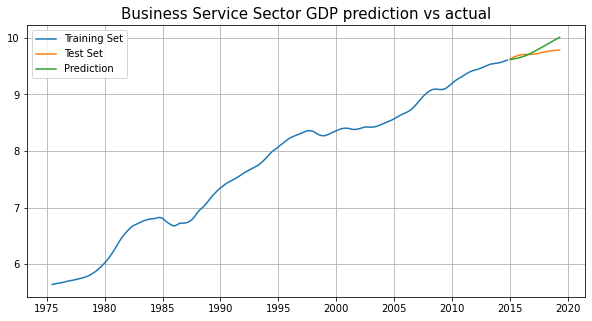

In [35]:
plt.figure(figsize = (10,5))
plt.plot(df_trend[:-18]["Log_B"], label="Training Set")
plt.plot(df_trend[-18:]["Log_B"], label="Test Set")
plt.plot(prediction["Log_B"], label="Prediction")

plt.title("Business Service Sector GDP prediction vs actual", fontsize = "15")

plt.grid()
plt.legend()
plt.show()

In [36]:
df_trend.iloc[-25:-10]["Log_B"]

Period
2013-04-01    9.533689
2013-07-01    9.543551
2013-10-01    9.550744
2014-01-01    9.558891
2014-04-01    9.571466
2014-07-01    9.589383
2014-10-01    9.608329
2015-01-01    9.630641
2015-04-01    9.654455
2015-07-01    9.677345
2015-10-01    9.695401
2016-01-01    9.703920
2016-04-01    9.707062
2016-07-01    9.707323
2016-10-01    9.708881
Name: Log_B, dtype: float64

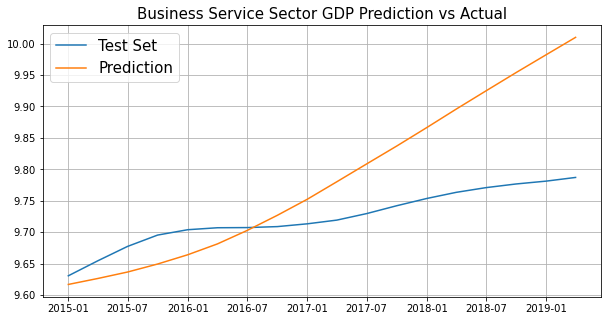

In [37]:
plt.figure(figsize = (10,5))
plt.plot(df_trend[-18:]["Log_B"], label="Test Set")
plt.plot(prediction["Log_B"], label="Prediction")

plt.title("Business Service Sector GDP Prediction vs Actual", fontsize = "15")

plt.grid()
plt.legend(fontsize="15")
plt.show()

## Prediction for 2020 and 2022

In [38]:
#log data
data_t = data[["Wholesale & Retail Trade","Business Services"] ]
data_t.insert(0, 'Log_B', data['Business Services'].apply(np.log))
data_t.insert(0, 'Log_W', data['Wholesale & Retail Trade'].apply(np.log))

data_t

,Log_W,Log_B,Wholesale & Retail Trade,Business Services
Period,,,,
1975-01-01,6.511448,5.592851,672.8,268.5
1975-04-01,6.558056,5.618951,704.9,275.6
1975-07-01,6.573680,5.664348,716.0,288.4
1975-10-01,6.585896,5.657389,724.8,286.4
1976-01-01,6.518410,5.666427,677.5,289.0
...,...,...,...,...
2019-04-01,9.934250,9.780715,20624.8,17689.3
2019-07-01,9.944332,9.782844,20833.8,17727.0
2019-10-01,9.992336,9.822830,21858.3,18450.2


In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result_W = seasonal_decompose(data_t['Log_W'],freq=4)
decompose_result_B = seasonal_decompose(data_t['Log_B'],freq=4)

data_trend_W = decompose_result_W.trend.dropna()
data_trend_B = decompose_result_B.trend.dropna()

In [56]:
data_trend_t = pd.concat([ data_trend_W, data_trend_B], axis =1) 
data_trend_t.columns = ["Log_W", "Log_B"]

In [57]:
data_trend_t

,Log_W,Log_B
Period,,
1975-07-01,6.558140,5.642582
1975-10-01,6.560087,5.655179
1976-01-01,6.568504,5.663050
1976-04-01,6.585530,5.672189
1976-07-01,6.607390,5.682812
...,...,...
2018-10-01,9.973626,9.776683
2019-01-01,9.959464,9.781215
2019-04-01,9.946158,9.787073


In [58]:
data_differenced_t = data_trend_t.diff().dropna()
data_differenced_t

,Log_W,Log_B
Period,,
1975-10-01,0.001947,0.012597
1976-01-01,0.008417,0.007870
1976-04-01,0.017026,0.009139
1976-07-01,0.021860,0.010624
1976-10-01,0.023366,0.014278
...,...,...
2018-10-01,-0.006111,0.005822
2019-01-01,-0.014161,0.004532
2019-04-01,-0.013306,0.005859


In [59]:
model = VAR(data_differenced_t)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic) #6

Lag Order = 1
AIC :  -18.5090568073266
Lag Order = 2
AIC :  -19.00258503826109
Lag Order = 3
AIC :  -19.053284401116677
Lag Order = 4
AIC :  -19.055372738760216
Lag Order = 5
AIC :  -19.29721930283366
Lag Order = 6
AIC :  -19.582481181181983
Lag Order = 7
AIC :  -19.56072002736343
Lag Order = 8
AIC :  -19.515290148108523
Lag Order = 9
AIC :  -19.604796946268056
Lag Order = 10
AIC :  -19.662245418430956
Lag Order = 11
AIC :  -19.71989744648961
Lag Order = 12
AIC :  -19.758477785217583


In [60]:
model_fitted_t = model.fit(6)

In [61]:
print(model_fitted_t.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Dec, 2020
Time:                     15:29:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.1048
Nobs:                     171.000    HQIC:                  -19.3887
Log likelihood:           1215.03    FPE:                3.13106e-09
AIC:                     -19.5825    Det(Omega_mle):     2.70426e-09
--------------------------------------------------------------------
Results for equation Log_W
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.002519         0.001113            2.264           0.024
L1.Log_W         1.620429         0.075856           21.362           0.000
L1.Log_B         0.129761         0.095528            1.358           0.174
L2.L

### From the regression results, our predictive model for the Business Service sector are as follows:


$$
\hat{LogB}_t = 1.758 LogB_{t-1} - 1.579 LogB_{t-2} + 1.362 LogB_{t-3} - 1.265 LogB_{t-4} + 0.977 LogB_{t-5} - 0.350 LogB_{t-6}  + 0.230 LogW_{t-1} - 0.284 LogW_{t-2} + 0.263 LogW_{t-3} - 0.261 LogW_{t-4}+ 0.260 LogW_{t-5}- 0.138 LogW_{t-6}
$$

In [62]:
# Get the lag order
lag_order = model_fitted_t.k_ar
print(lag_order)  #= 6

# Input data for forecasting
forecast_input_t = data_differenced_t.values[-lag_order:]
forecast_input_t

6


array([[ 0.00130699,  0.00749526],
       [-0.00611071,  0.00582241],
       [-0.01416139,  0.00453166],
       [-0.01330642,  0.00585853],
       [-0.01659344, -0.00026833],
       [-0.04223321, -0.03406917]])

In [63]:
# Forecast for the next 12 period
fc_t = model_fitted_t.forecast(y=forecast_input_t, steps =12 )
data_forecast_t = pd.DataFrame(fc_t,  columns=data_differenced_t.columns)  
data_forecast_t

,Log_W,Log_B
0,-0.052925,-0.059852
1,-0.046043,-0.059805
2,-0.036281,-0.055466
3,-0.012055,-0.043533
4,0.009009,-0.026446
5,0.012846,-0.023286
6,0.015444,-0.022907
7,0.015498,-0.014521
8,0.013397,-0.007812
9,0.019673,0.001085


In [64]:
# invert prediction result to logged GDP trend
abc = data_trend_t.iloc[-1:,1:] #extract actual data as base to invert forecasted value
prediction_t = pd.concat([abc,data_forecast_t.iloc[:,1:]]).cumsum()[1:]
prediction_t = pd.DataFrame(prediction_t)

d = ['2020-01-01','2020-04-01','2020-07-01','2020-10-01',
     '2021-01-01','2021-04-01','2021-07-01','2021-10-01',
     '2022-01-01','2022-04-01','2022-07-01','2022-10-01',]
d =pd.to_datetime(d, format = '%Y-%m-%d')
prediction_t.set_index(d,inplace=True)
prediction_t

,Log_B
2020-01-01,9.692884
2020-04-01,9.633079
2020-07-01,9.577613
2020-10-01,9.534079
2021-01-01,9.507633
2021-04-01,9.484347
2021-07-01,9.461441
2021-10-01,9.446920
2022-01-01,9.439108
2022-04-01,9.440193


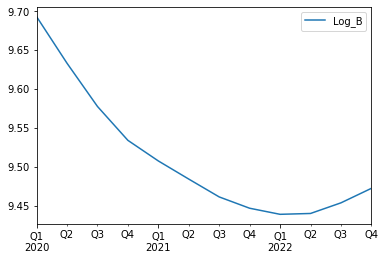

In [65]:
prediction_t.plot()

In [66]:
data_trend_t

,Log_W,Log_B
Period,,
1975-07-01,6.558140,5.642582
1975-10-01,6.560087,5.655179
1976-01-01,6.568504,5.663050
1976-04-01,6.585530,5.672189
1976-07-01,6.607390,5.682812
...,...,...
2018-10-01,9.973626,9.776683
2019-01-01,9.959464,9.781215
2019-04-01,9.946158,9.787073


In [67]:
prediction_t

,Log_B
2020-01-01,9.692884
2020-04-01,9.633079
2020-07-01,9.577613
2020-10-01,9.534079
2021-01-01,9.507633
2021-04-01,9.484347
2021-07-01,9.461441
2021-10-01,9.446920
2022-01-01,9.439108
2022-04-01,9.440193


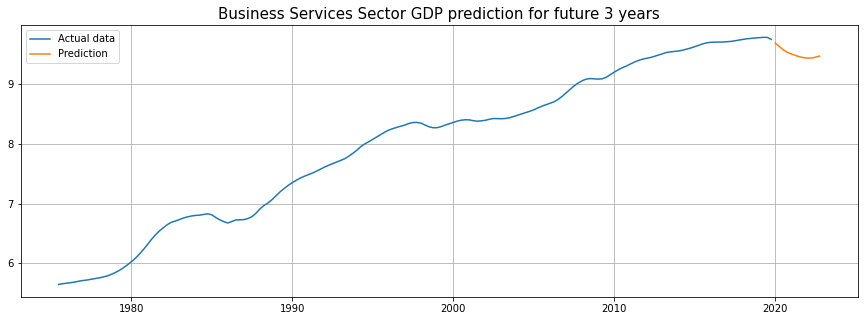

In [68]:
#plot prediction vs test set data
plt.figure(figsize = (15,5))
plt.plot(data_trend_t.iloc[:,1], label="Actual data")
plt.plot(prediction_t.iloc[:,0], label="Prediction")

plt.title("Business Services Sector GDP prediction for future 3 years", fontsize = "15")

plt.grid()
plt.legend()
plt.show()

In [72]:
data_trend_t

,Log_W,Log_B
Period,,
1975-07-01,6.558140,5.642582
1975-10-01,6.560087,5.655179
1976-01-01,6.568504,5.663050
1976-04-01,6.585530,5.672189
1976-07-01,6.607390,5.682812
...,...,...
2018-10-01,9.973626,9.776683
2019-01-01,9.959464,9.781215
2019-04-01,9.946158,9.787073


In [74]:
data_trend_t

,Log_W,Log_B
Period,,
1975-07-01,6.558140,5.642582
1975-10-01,6.560087,5.655179
1976-01-01,6.568504,5.663050
1976-04-01,6.585530,5.672189
1976-07-01,6.607390,5.682812
...,...,...
2018-10-01,9.973626,9.776683
2019-01-01,9.959464,9.781215
2019-04-01,9.946158,9.787073


In [73]:
#summarize prediction result into dataframe
total= pd.concat([np.exp(data_trend_t.iloc[-1:,1:]),np.exp(prediction_t)],axis=0)
growth = total.pct_change().iloc[1:,:]
growth.columns=['Growth Rate of prediction']
growth

,Growth Rate of prediction
2020-01-01,-0.058096
2020-04-01,-0.058052
2020-07-01,-0.053956
2020-10-01,-0.042600
2021-01-01,-0.026099
2021-04-01,-0.023017
2021-07-01,-0.022647
2021-10-01,-0.014416
2022-01-01,-0.007782
2022-04-01,0.001086


## Thanks!

In [54]:
type(growth)

pandas.core.frame.DataFrame